In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.metrics import euclidean_distances

In [82]:
data = pd.read_csv('df.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [83]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [84]:
data.shape

(200, 5)

In [85]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [86]:
featureset = data[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
featureset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [87]:
from sklearn.preprocessing import LabelEncoder

le_gen = LabelEncoder().fit(featureset['Gender'])
x = le_gen.fit_transform(featureset['Gender'])
featureset['Gender'] = x
featureset.head()

/var/folders/f0/jlv7kmc54933ltbm2dzsh3k80000gn/T/ipykernel_741/131372435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset['Gender'] = x


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


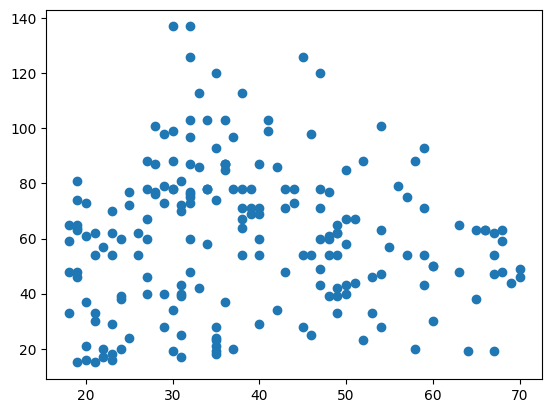

In [88]:
plt.scatter(featureset['Age'], featureset['Annual Income (k$)'])

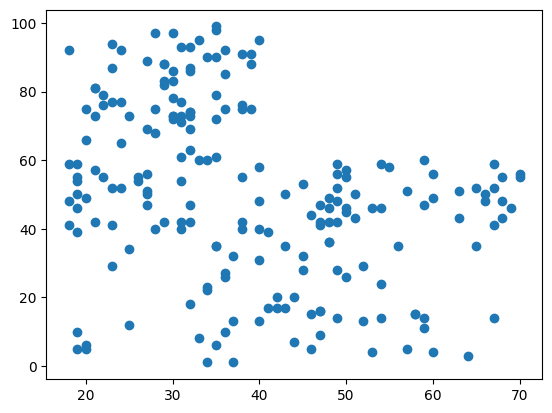

In [89]:
plt.scatter(featureset['Age'], featureset['Spending Score (1-100)'])

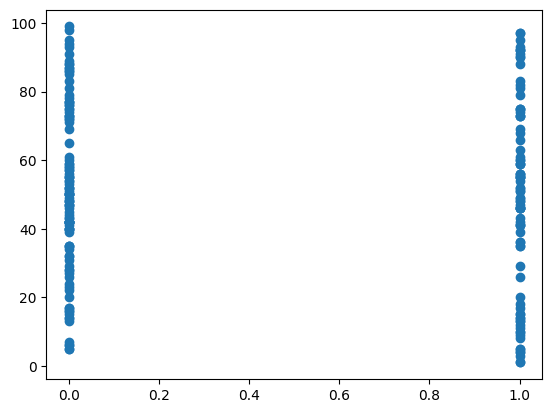

In [90]:
plt.scatter(featureset['Gender'], featureset['Spending Score (1-100)'])

In [91]:
x = featureset.values

In [92]:
featureset.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [93]:
clusters = 5
modelk = KMeans(n_clusters=clusters, init='k-means++', n_init=13)
modelk.fit(x)

KMeans(n_clusters=5, n_init=13)

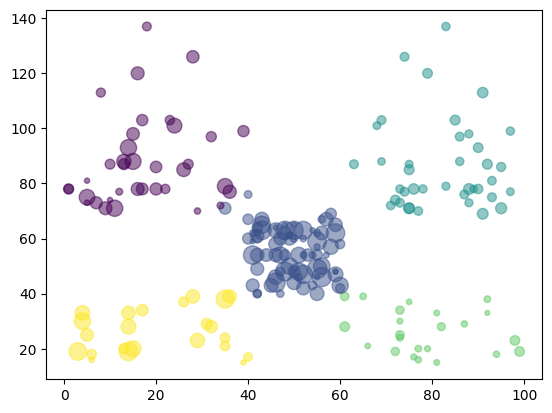

In [94]:
area = (np.pi*x[:,1]**2)/80
plt.scatter(x[:,3], x[:,2], c = modelk.labels_, s = area, alpha=0.5)

count of labels:  5


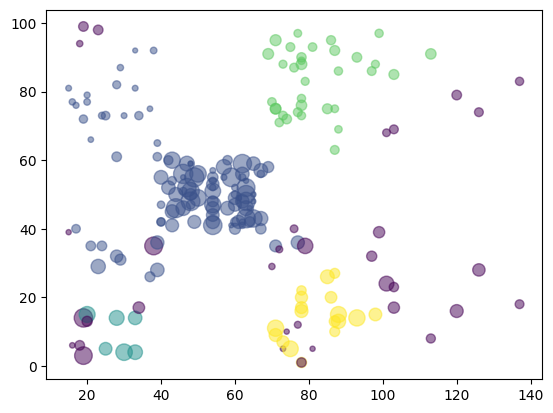

In [143]:
modeldb = DBSCAN(min_samples=5, eps=12.2)
modeldb.fit(x)

print('count of labels: ', len(set(modeldb.labels_)))
plt.scatter(x[:,2], x[:,3], c = modeldb.labels_, s = area, alpha=0.5)

In [102]:
dist = distance_matrix(x, x)
dist

array([[  0.        ,  42.04759208,  33.04542328, ..., 117.1110584 ,
        124.47489707, 130.15759678],
       [ 42.04759208,   0.        ,  75.01999733, ..., 111.7631424 ,
        137.74614332, 122.34786471],
       [ 33.04542328,  75.01999733,   0.        , ..., 129.8807145 ,
        122.18837915, 143.77412841],
       ...,
       [117.1110584 , 111.7631424 , 129.8807145 , ...,   0.        ,
         57.07013229,  14.35270009],
       [124.47489707, 137.74614332, 122.18837915, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.15759678, 122.34786471, 143.77412841, ...,  14.35270009,
         65.03076195,   0.        ]])

In [107]:
z = hierarchy.linkage(dist, 'complete')

/var/folders/f0/jlv7kmc54933ltbm2dzsh3k80000gn/T/ipykernel_741/1551319522.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist, 'complete')


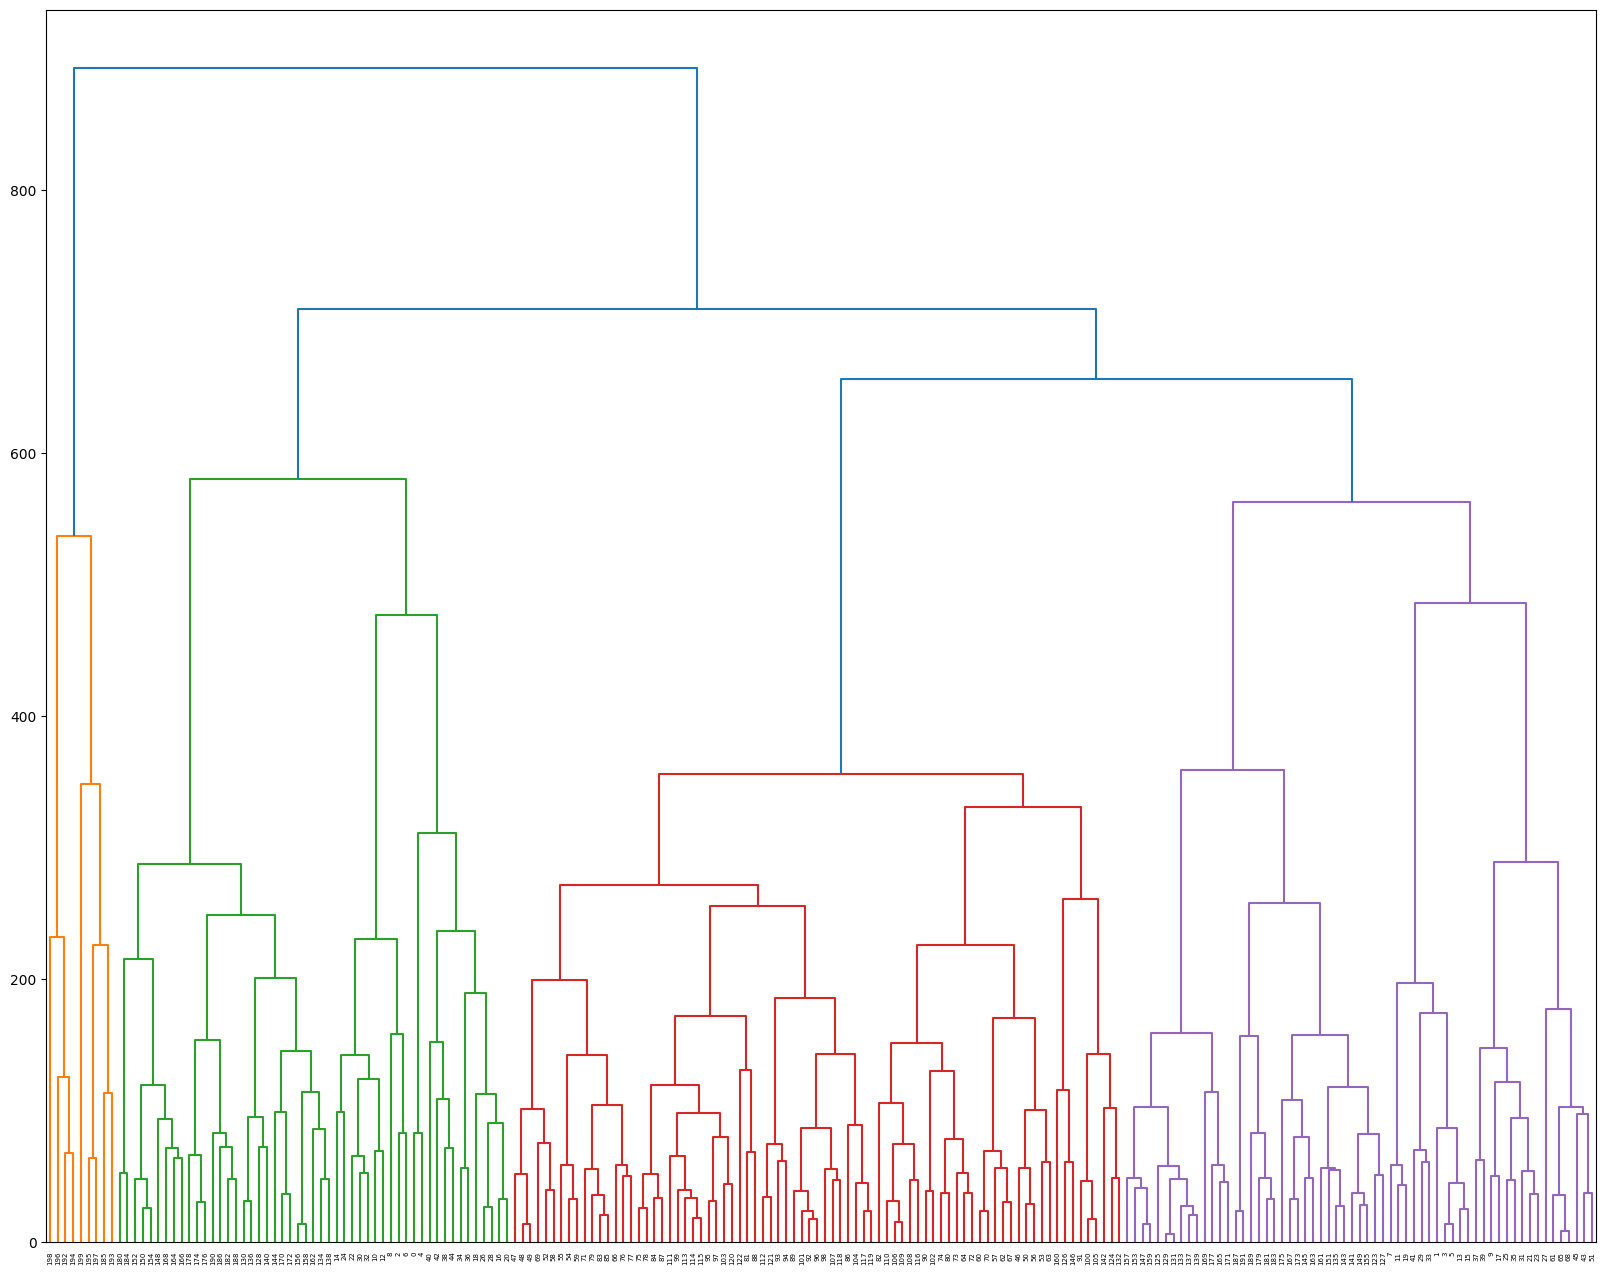

In [112]:
fig = plt.figure(figsize=[20, 16])
dendo = hierarchy.dendrogram(z)

In [126]:
agglom = AgglomerativeClustering(linkage='average', n_clusters=5)
agglom.fit(x)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [127]:
agglom.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

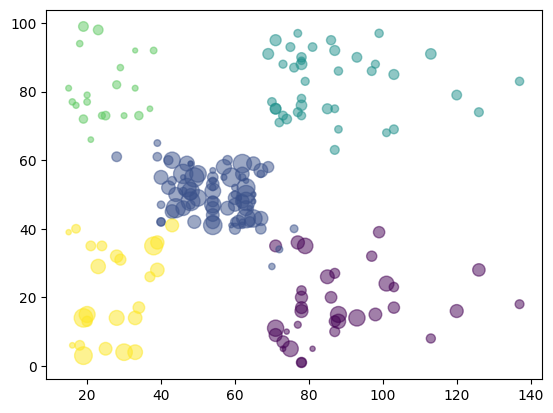

In [130]:
plt.scatter(x[:,2], x[:,3], c = agglom.labels_, s = area, alpha= 0.5)